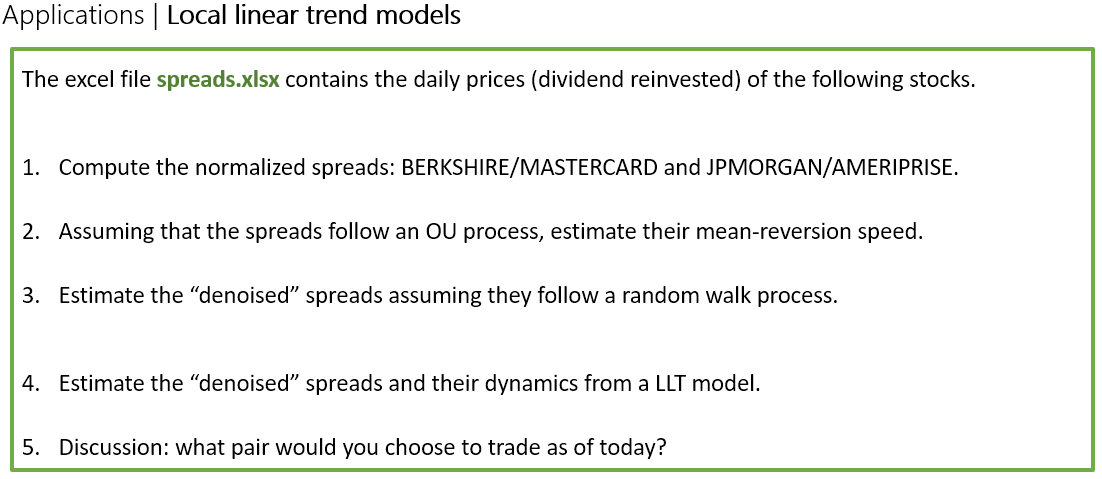

Import Libraries and data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
MARKET_PRICES=pd.read_excel('APPLICATION_PART_2.xlsx', 'MARKET_PRICES',usecols='B:E')
NAMES=list(MARKET_PRICES)
MARKET_PRICES=np.array(MARKET_PRICES)
TR_PRICES=np.array(pd.read_excel('APPLICATION_PART_2.xlsx', 'INDICES_REINVESTED DIVIDENDS',usecols='B:E'))
n_stocks=MARKET_PRICES.shape[1]
n_obs=MARKET_PRICES.shape[0]

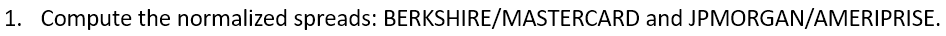

In this exemple, price spreads are computed as the difference in the cumulated returns of both stocks

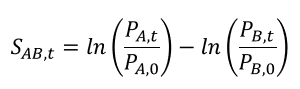

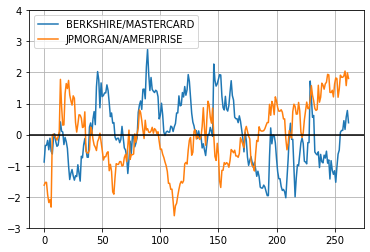

In [3]:
SPREAD_CUMRET_1=preprocessing.scale(TR_PRICES[:,0]/TR_PRICES[0,0]-TR_PRICES[:,1]/TR_PRICES[0,1])
SPREAD_CUMRET_2=preprocessing.scale(TR_PRICES[:,2]/TR_PRICES[0,2]-TR_PRICES[:,3]/TR_PRICES[0,3])
y1=SPREAD_CUMRET_1
y2=SPREAD_CUMRET_2
plt.plot(y1, label="BERKSHIRE/MASTERCARD")
plt.plot(y2, label="JPMORGAN/AMERIPRISE")
plt.legend(loc="upper left")
plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.ylim(-3, 4)
plt.show()

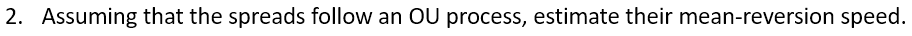

Estimation of the parameters of the OU process using the folloing AR-1 discretisation:

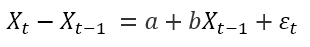

In [4]:
D_CUMRET_1=SPREAD_CUMRET_1[1:]-SPREAD_CUMRET_1[:-1]
model=sm.OLS(D_CUMRET_1,sm.add_constant(SPREAD_CUMRET_1[1:]))
output=model.fit()
a,b=output.params

Thus retrieving the parameters of the OU process

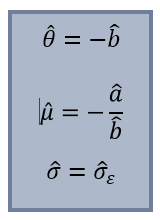

In [5]:
theta=-b
mu=-a/b

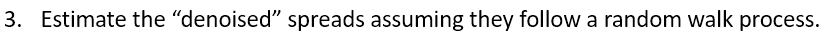

We estimate the following model:

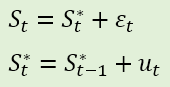

Import the Kalman Random Walk library

Content: Kalman_RW(Y,X,sr) that estimates the model

Input parameters

    Y: the measurement
    X: explanatory factors
    sr: the signal to noise ratio such as
    
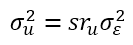

Output:

    filtered state
    smoothed state
    

In [6]:
from Kalman_Random_Walk import Kalman_RW

BERKSHIRE/MASTERCARD

True


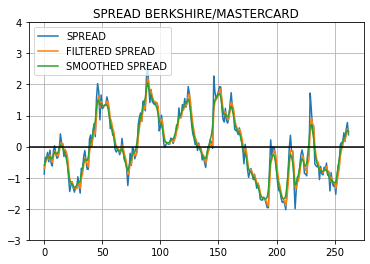

In [7]:
ones=np.ones((n_obs,1))
output_RW=Kalman_RW(SPREAD_CUMRET_1,ones,0.5)
SPREAD_CUMRET_1_FILTERED=output_RW[0]
SPREAD_CUMRET_1_SMOOTHED=output_RW[1]
y1=SPREAD_CUMRET_1
y2=SPREAD_CUMRET_1_FILTERED
y3=SPREAD_CUMRET_1_SMOOTHED
plt.plot(y1,label="SPREAD")
plt.plot(y2,label="FILTERED SPREAD")
plt.plot(y3,label="SMOOTHED SPREAD")
plt.legend(loc="upper left")
plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.title("SPREAD BERKSHIRE/MASTERCARD")
plt.ylim(-3, 4)
plt.show()

JPMORGAN/AMERIPRISE

True


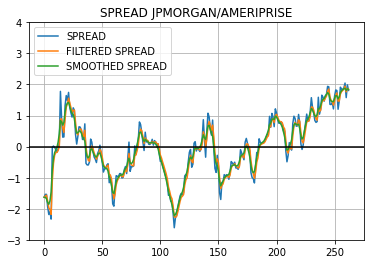

In [8]:
ones=np.ones((n_obs,1))
output_RW=Kalman_RW(SPREAD_CUMRET_2,ones,0.5)
SPREAD_CUMRET_2_FILTERED=output_RW[0]
SPREAD_CUMRET_2_SMOOTHED=output_RW[1]
y1=SPREAD_CUMRET_2
y2=SPREAD_CUMRET_2_FILTERED
y3=SPREAD_CUMRET_2_SMOOTHED
plt.plot(y1,label="SPREAD")
plt.plot(y2,label="FILTERED SPREAD")
plt.plot(y3,label="SMOOTHED SPREAD")
plt.legend(loc="upper left")
plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.title("SPREAD JPMORGAN/AMERIPRISE")
plt.ylim(-3, 4)
plt.show()

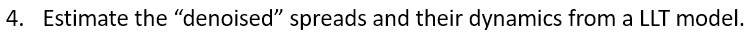

We estimate the following model

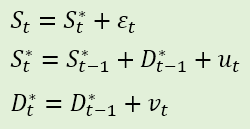

Import the Kalman Local Linear Trend library

Content: Kalman_LLT(Y,X,sr1, sr2) that estimates the model

Input parameters

    Y: the measurement
    X: explanatory factors
    sr1, sr2: the signal to noise ratios such as
    
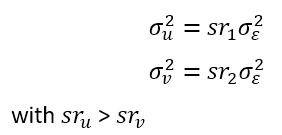

Output:

    filtered states (spread and slope)
    smoothed states (spread and slope)

In [9]:
from Kalman_LLT import Kalman_LLT

BERKSHIRE/MASTERCARD

In [10]:
var=sm.add_constant(np.zeros((n_obs,1)))
output_LLT=Kalman_LLT(SPREAD_CUMRET_1,var,0.5,0.5**2)
SPREAD_CUMRET_1_FILTERED_LLT=output_LLT[0][:,0]
SPREAD_CUMRET_1_SMOOTHED_LLT=output_LLT[1][:,0]

True


Plot the spread

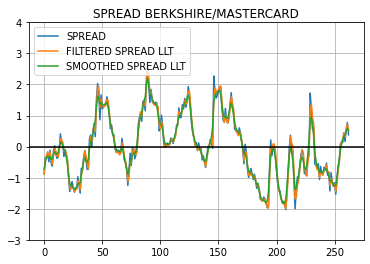

In [11]:
y1=SPREAD_CUMRET_1
y2=SPREAD_CUMRET_1_FILTERED_LLT
y3=SPREAD_CUMRET_1_SMOOTHED_LLT
plt.plot(y1,label="SPREAD")
plt.plot(y2,label="FILTERED SPREAD LLT")
plt.plot(y3,label="SMOOTHED SPREAD LLT")
plt.legend(loc="upper left")
plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.title("SPREAD BERKSHIRE/MASTERCARD")
plt.ylim(-3, 4)
plt.show()

Plot the slope of the spread

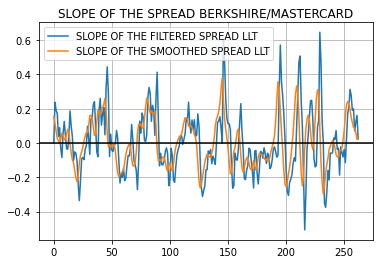

In [12]:
SLOPE_SPREAD_CUMRET_1_FILTERED_LLT=output_LLT[0][:,1]
SLOPE_SPREAD_CUMRET_1_SMOOTHED_LLT=output_LLT[1][:,1]
y1=SLOPE_SPREAD_CUMRET_1_FILTERED_LLT
y2=SLOPE_SPREAD_CUMRET_1_SMOOTHED_LLT
plt.plot(y1,label="SLOPE OF THE FILTERED SPREAD LLT")
plt.plot(y2,label="SLOPE OF THE SMOOTHED SPREAD LLT")
plt.legend(loc="upper left")
plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.title("SLOPE OF THE SPREAD BERKSHIRE/MASTERCARD")
plt.show()